In [1265]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn
# import numpy as np

# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from scipy.stats import uniform
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, r2_score

In [1266]:
df= pd.read_csv('D:\Projects\MachineLearning\Data\WHO LifeExpectancy\Life Expectancy Data.csv')
print(df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_10812\1735529914.py:1: SyntaxWarning: invalid escape sequence '\P'
  df= pd.read_csv('D:\Projects\MachineLearning\Data\WHO LifeExpectancy\Life Expectancy Data.csv')


In [1267]:
null_counts = df.isna().sum()

In [1268]:
null_counts

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [1269]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

print(df.columns)

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [1270]:
num_cols = ["Adult_Mortality", "Alcohol", "Hepatitis_B", "Polio", "Diphtheria",
            "Total_expenditure", "GDP", "Population", "thinness_5-9_years",
            "thinness__1-19_years", "Income_composition_of_resources", "Schooling"]

for col in num_cols:
    df[col] = df.groupby("Country")[col].transform(lambda x: x.fillna(x.median()))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  ret

In [1271]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Display final null values to verify
print(df.isnull().sum())

Country                             0
Year                                0
Status                              0
Life_expectancy                    10
Adult_Mortality                     0
infant_deaths                       0
Alcohol                             0
percentage_expenditure              0
Hepatitis_B                         0
Measles                             0
BMI                                34
under-five_deaths                   0
Polio                               0
Total_expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                          0
thinness__1-19_years                0
thinness_5-9_years                  0
Income_composition_of_resources     0
Schooling                           0
dtype: int64


In [1272]:
df = df.dropna(subset=["BMI"])
df = df.dropna(subset=["Life_expectancy"])
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [1273]:
print(df.info())
print(df['Status'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2896 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2896 non-null   object 
 1   Year                             2896 non-null   int64  
 2   Status                           2896 non-null   object 
 3   Life_expectancy                  2896 non-null   float64
 4   Adult_Mortality                  2896 non-null   float64
 5   infant_deaths                    2896 non-null   int64  
 6   Alcohol                          2896 non-null   float64
 7   percentage_expenditure           2896 non-null   float64
 8   Hepatitis_B                      2896 non-null   float64
 9   Measles                          2896 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five_deaths                2896 non-null   int64  
 12  Polio                    

In [1274]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'Country' column
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# Display the first few rows to check the encoding
print(df[['Country', 'Country_encoded']].head())
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})
Country = df.pop("Country")  # Remove and store the column

       Country  Country_encoded
0  Afghanistan                0
1  Afghanistan                0
2  Afghanistan                0
3  Afghanistan                0
4  Afghanistan                0


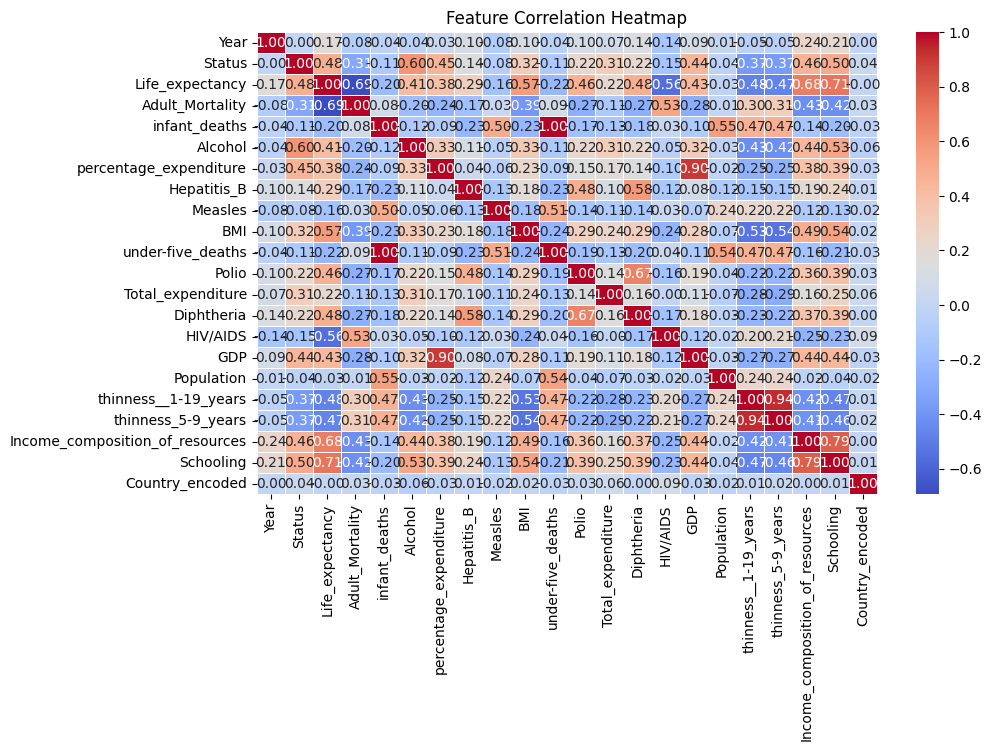

In [1275]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [1276]:
df.pop('infant_deaths')
df.pop('thinness_5-9_years')
df.pop('thinness__1-19_years')
df.pop('percentage_expenditure')
df.pop('Year')
df.pop('Country_encoded')

0         0
1         0
2         0
3         0
4         0
       ... 
2933    180
2934    180
2935    180
2936    180
2937    180
Name: Country_encoded, Length: 2896, dtype: int32

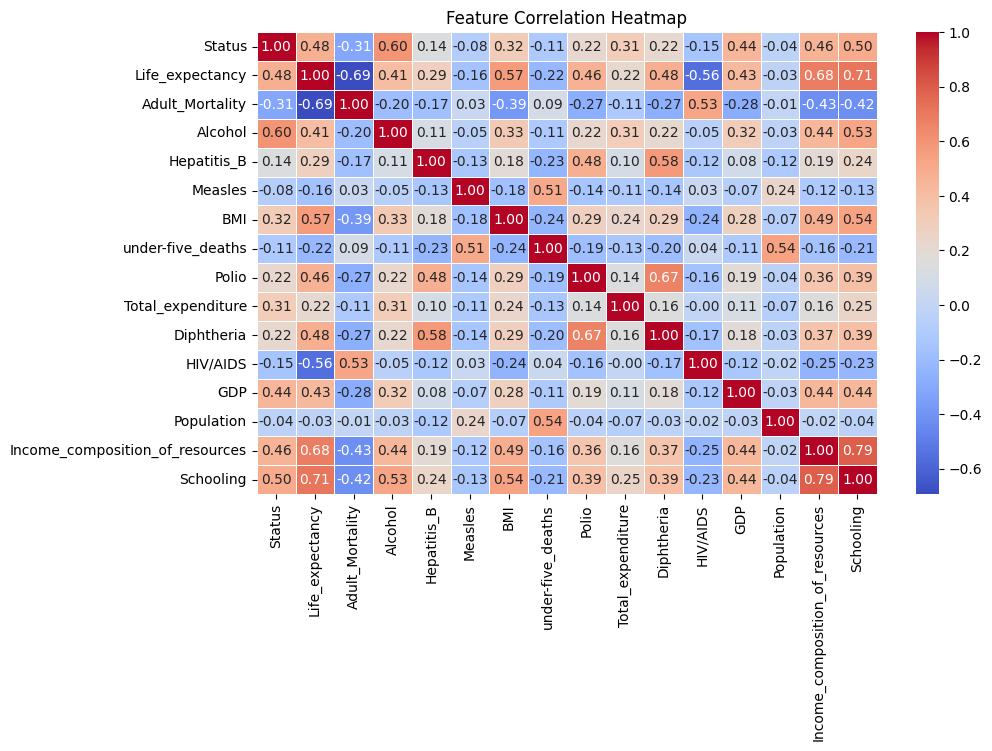

In [1277]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [1278]:
le = df.pop("Life_expectancy")
df["Life_Expectancy"] = le

In [1279]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [1280]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [1281]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.fit_transform(y_test.reshape(-1, 1)).ravel()

In [1282]:
param_dist = {
    'C': uniform(1, 1000),  # Random values from 1 to 1000
    'epsilon': uniform(0.01, 1),  # Random values from 0.01 to 1
    'gamma': ['scale', 'auto']  # Only scale or auto, no scipy distribution
}


In [1283]:
# random_search = RandomizedSearchCV(SVR(kernel='rbf'), param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, error_score='raise')

# # Fit on training data
# random_search.fit(x_train_scaled, y_train_scaled)

# # Best parameters and score
# print("Best parameters found: ", random_search.best_params_)
# print("Best score found: ", random_search.best_score_)

# # Evaluate on test data using best found model
# best_svr = random_search.best_estimator_
# y_pred = best_svr.predict(x_test_scaled)
# y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

In [1284]:
svr = SVR(kernel='rbf', C=5, epsilon= 0.085,gamma='auto')
svr.fit(x_train_scaled, y_train_scaled)

SVR(C=5, epsilon=0.085, gamma='auto')

In [1285]:
y_pred=svr.predict(x_test_scaled)
Y_pred=svr.predict(x_train_scaled)

In [1286]:
mse_train = mean_squared_error(y_train_scaled, Y_pred)
mse_test = mean_squared_error(y_test_scaled, y_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R² score
r2_train = r2_score(y_train_scaled, Y_pred)
r2_test = r2_score(y_test_scaled, y_pred)

print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

Training Set Performance:
Mean Squared Error (MSE): 0.0375
Root Mean Squared Error (RMSE): 0.1937
R² Score: 0.9625

Test Set Performance:
Mean Squared Error (MSE): 0.0690
Root Mean Squared Error (RMSE): 0.2627
R² Score: 0.9310


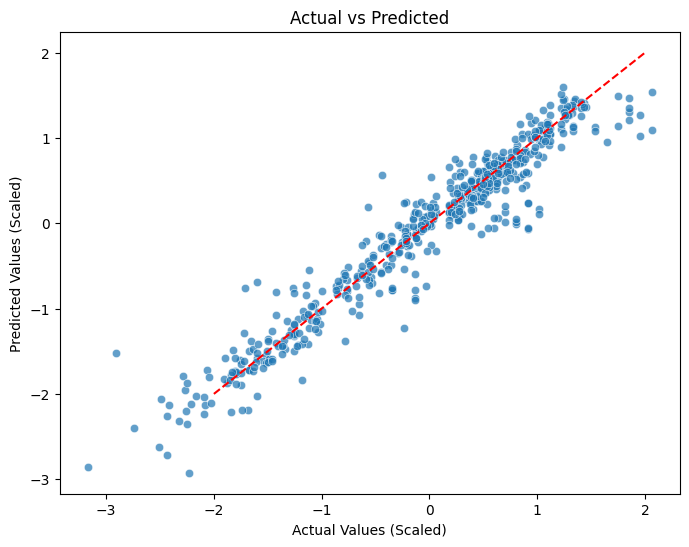

In [1287]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_scaled, y=y_pred, alpha=0.7)
plt.plot([-2, 2], [-2, 2], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Values (Scaled)")
plt.ylabel("Predicted Values (Scaled)")
plt.title("Actual vs Predicted")
plt.show()


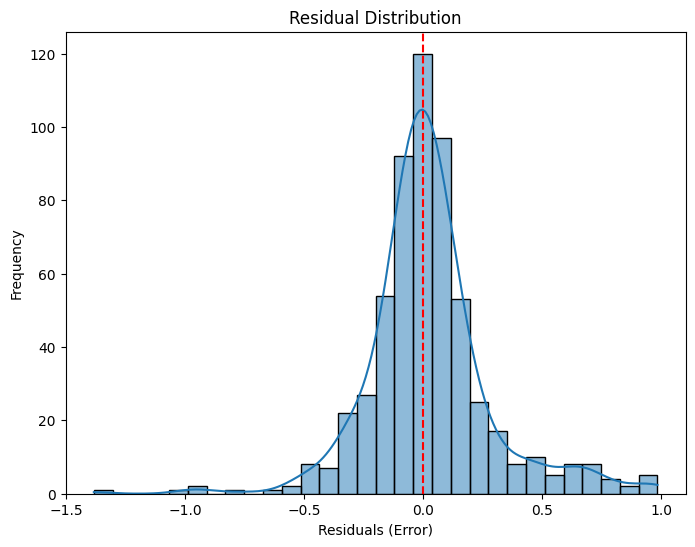

In [1288]:
residuals = y_test_scaled - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')  # Ideally, residuals should be centered around zero
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


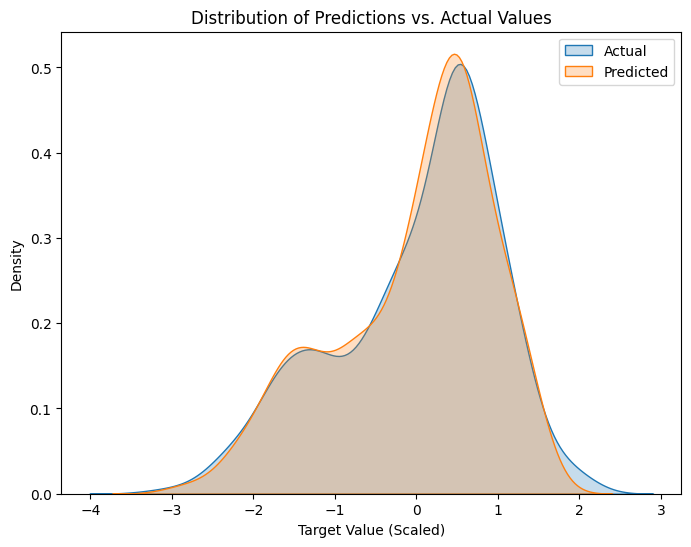

In [1290]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test_scaled, label="Actual", fill=True)
sns.kdeplot(y_pred, label="Predicted", fill=True)
plt.xlabel("Target Value (Scaled)")
plt.ylabel("Density")
plt.title("Distribution of Predictions vs. Actual Values")
plt.legend()
plt.show()